
# <b>Team $T^3$ present.....</b>

## <b>... a numerical comparison of ensemble forecasts.</b>



## Motivation: Storm Desmond

Mogreps-UK is the Met Office's convection-permitting scale (2.2km) ensemble. The ensemble has 12 members (1 control -- the member considered here) and 11 perturbed, running 3-hourly forecasts up to 36 hours every six hours. The combination of the fine resolution and ensemble allows for probabilistic forecasting of local (by which we mean UK-specific) weather. In this notebook we examine some of the behaviour of the control member of the ensemble in the run-up to 6pm 5th December 2015, the night of Storm Desmond. 

Storm Desmond was the fourth named storm in the 2015/16 UK and Ireland winter storm season, and is famous for causing major flooding across large swathes of Northern England, Wales and Scotland. The storm broke the United Kingdom's 24-hour rainfall record, with 341.4 mm of rain falling at Honister Pass, Cumbria, on 5 December.

In [11]:
import numpy, scipy, matplotlib, cartopy, netCDF4, seaborn, mogreps, tplots

File prods_op_mogreps-uk_20151205_15_00_003.nc already exists.
File prods_op_mogreps-uk_20151205_09_00_009.nc already exists.
File prods_op_mogreps-uk_20151205_03_00_015.nc already exists.
File prods_op_mogreps-uk_20151204_21_00_021.nc already exists.
File prods_op_mogreps-uk_20151204_15_00_027.nc already exists.
File prods_op_mogreps-uk_20151204_09_00_033.nc already exists.


In [4]:
from pathlib import Path

In [5]:
forecast_3 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 15, 0 , 3),data_folder = Path('.'))
forecast_9 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 9, 0 , 9),data_folder = Path('.'))
forecast_15 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 5, 3, 0 , 15),data_folder = Path('.'))
forecast_21 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 4, 21, 0 , 21),data_folder = Path('.'))
forecast_27 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 4, 15, 0 , 27),data_folder = Path('.'))
forecast_33 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2015, 12, 4, 9, 0 , 33),data_folder = Path('.'))

File prods_op_mogreps-uk_20151205_15_00_003.nc already exists.
File prods_op_mogreps-uk_20151205_09_00_009.nc already exists.
File prods_op_mogreps-uk_20151205_03_00_015.nc already exists.
File prods_op_mogreps-uk_20151204_21_00_021.nc already exists.
File prods_op_mogreps-uk_20151204_15_00_027.nc already exists.
File prods_op_mogreps-uk_20151204_09_00_033.nc already exists.


In [6]:
DS_forecast_3 = netCDF4.Dataset(forecast_3)
DS_forecast_9 = netCDF4.Dataset(forecast_9)
DS_forecast_15 = netCDF4.Dataset(forecast_15)
DS_forecast_21 = netCDF4.Dataset(forecast_21)
DS_forecast_27 = netCDF4.Dataset(forecast_27)
DS_forecast_33 = netCDF4.Dataset(forecast_33)

forecasts = [DS_forecast_3, DS_forecast_9, DS_forecast_15, DS_forecast_21, DS_forecast_27, DS_forecast_33]

In [7]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

Text(0.5,0.98,'Forecasts for sea-level air pressure (Pa) 6pm 5th December 2015 at a variety of lead times')

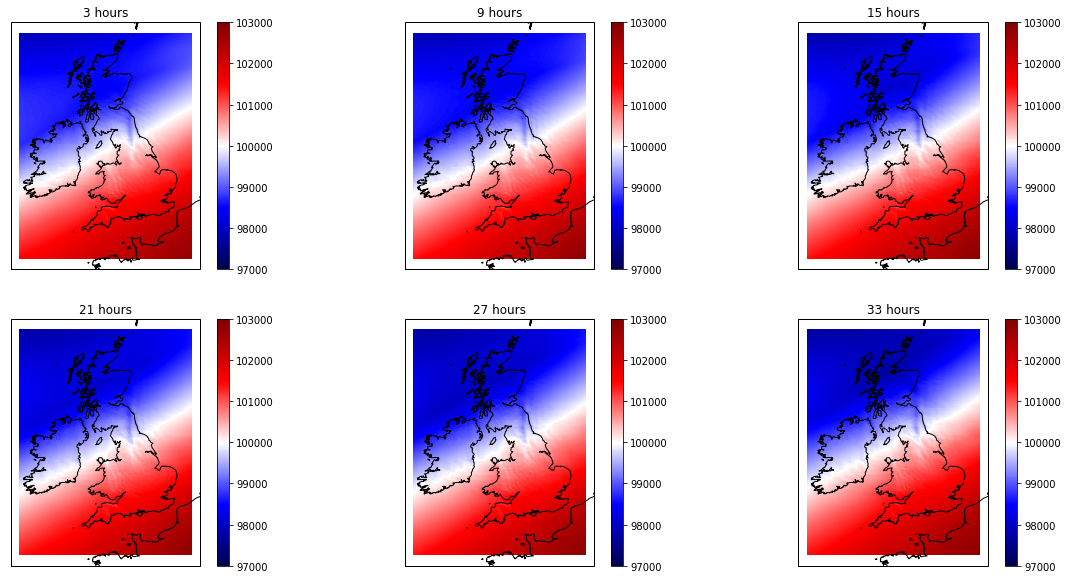

In [12]:
test_variable = "air_pressure_at_sea_level"
v_min = 97000
v_max = 103000

tplots.pressure_plots(test_variable, v_min, v_max)

fig.suptitle('Forecasts for sea-level air pressure (Pa) 6pm 5th December 2015 at a variety of lead times')

The evolution of the forecase from 33 hours out (so forecast 9am 4th December) to 3 (3pm 5th December) is most illuminating as a gif:


<center>
![Alt Text](https://i.imgur.com/rOPOLaB.gif)
</center>

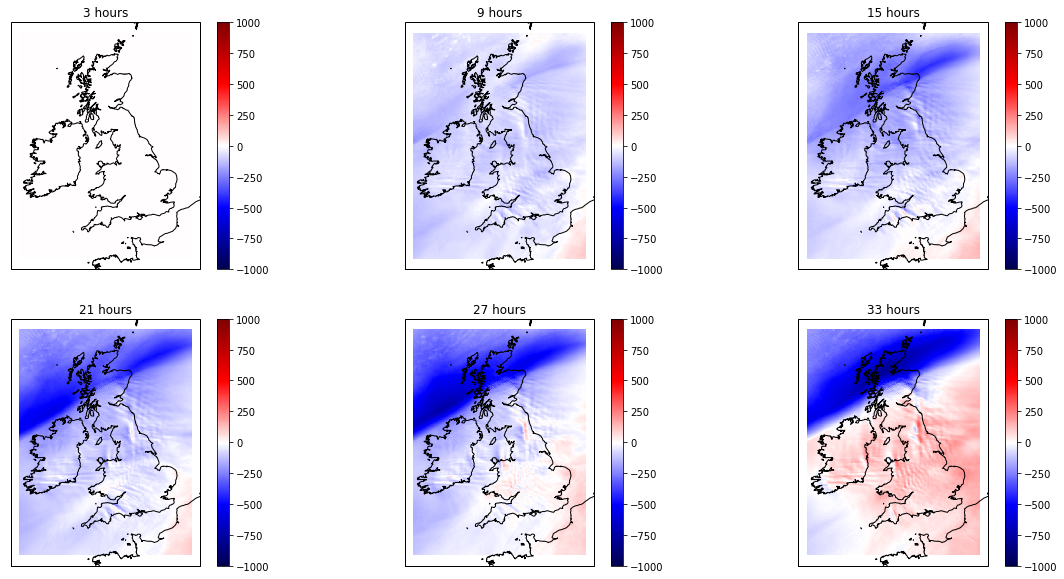

In [14]:
test_variable = "air_pressure_at_sea_level"
v_min = -1000
v_max = 1000


tplots.difference_plots(test_variable, v_min, v_max)

Text(0.5,0.98,'Wind speeds of gust')

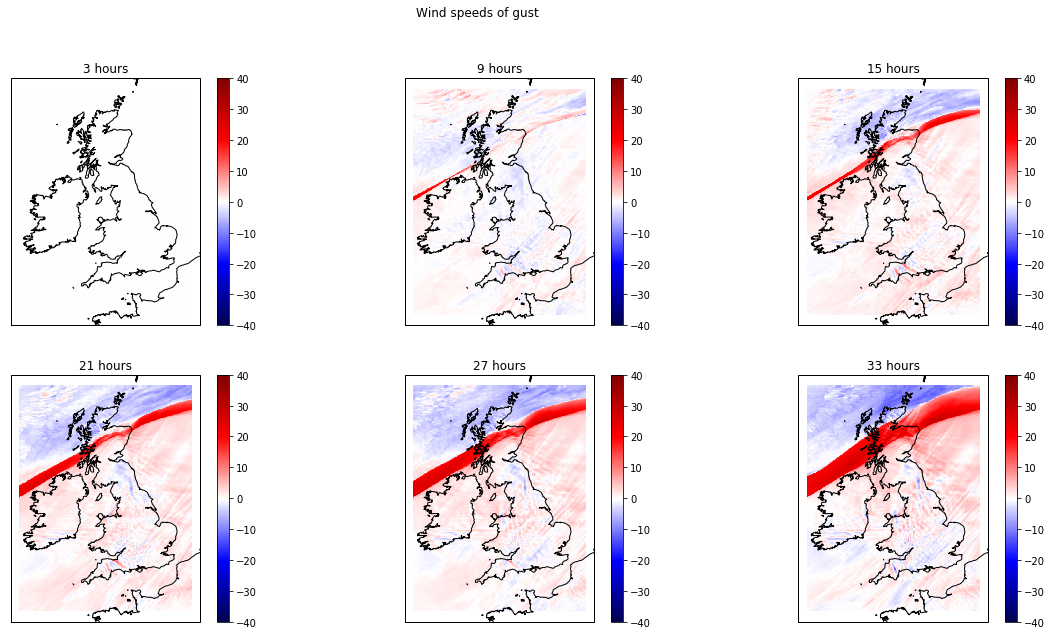

In [16]:
test_variable = "wind_speed_of_gust"
v_min = -40
v_max = 40

tplots.difference_plots(test_variable, v_min, v_max)
plt.suptitle("Wind speeds of gust")


We might expect the rainfall rate to be harder to predict, and thus to vary more as the forecast window gets shorter. 

<center>
![Alt Text](https://i.imgur.com/LrA82pQ.gif)
</center>

Text(0.5,0.98,'Difference between rainfall rate (kg m-2 s-1) 6pm 5tbh December 2015')

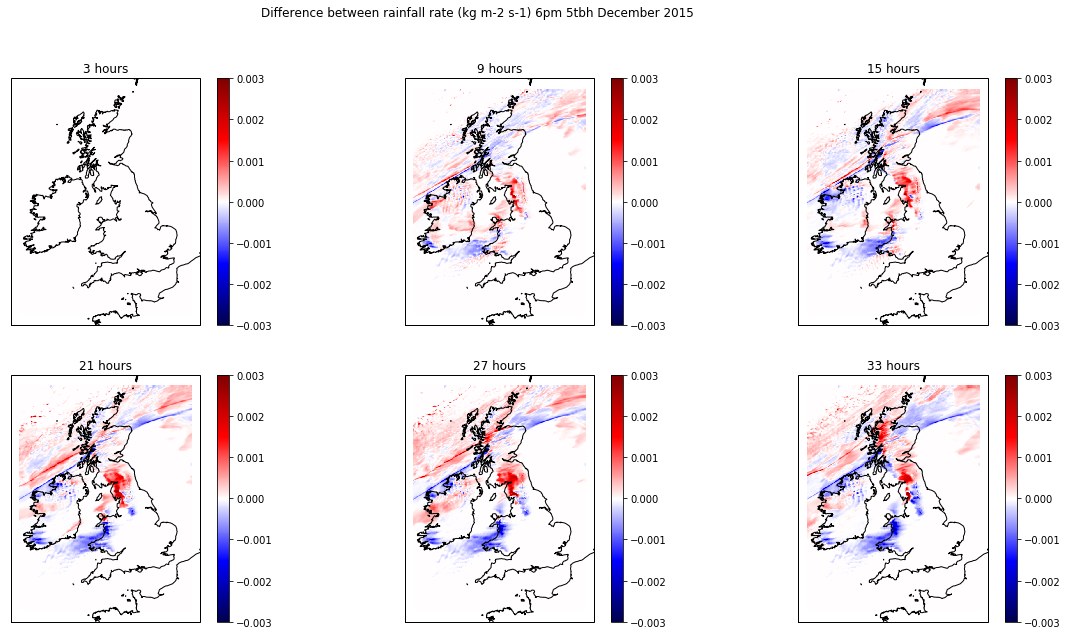

In [11]:
test_variable = "stratiform_rainfall_rate"
v_min = -0.003
v_max = 0.003


rotation = forecasts[0]['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude, pole_latitude = rotation.grid_north_pole_latitude)
projection = transform
fig = plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = fig.add_subplot(2,3,i+1, projection=projection)
    pcm = ax.pcolormesh(
        forecasts[i]['grid_longitude'],
        forecasts[i]['grid_latitude'],
        forecasts[i][test_variable][35] - forecasts[0][test_variable][35],
        transform=transform, vmin = v_min, vmax = v_max, cmap = 'seismic')
    ax.coastlines(resolution='10m')
    ax.set_title(str(6*(i+1)-3)+" hours")
    plt.colorbar(pcm,ax=ax)
fig.suptitle("Difference between rainfall rate (kg m-2 s-1) 6pm 5tbh December 2015")